In [136]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |



In [137]:
# Importar el csv
df = pd.read_csv('/Users/mirandag/Documents/BI/Sin título/hotel_bookings.csv')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [139]:
df.shape

(119390, 32)

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


adr-> el precio promedio que se paga al dia / teine valores negativos 
adultos /bebes/children-> sus maximos son de 10 no parece tener sentido el de adultos hasta 55
37% personas ahn cancelado
el tiempo promedio de anticipacion es de 104 aprox 3.5 meses
cada reservacion teine en promedio 1.8 adultos 


In [141]:
# reservations tatus date es fecha 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [142]:
df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [143]:
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [144]:
df.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [145]:

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

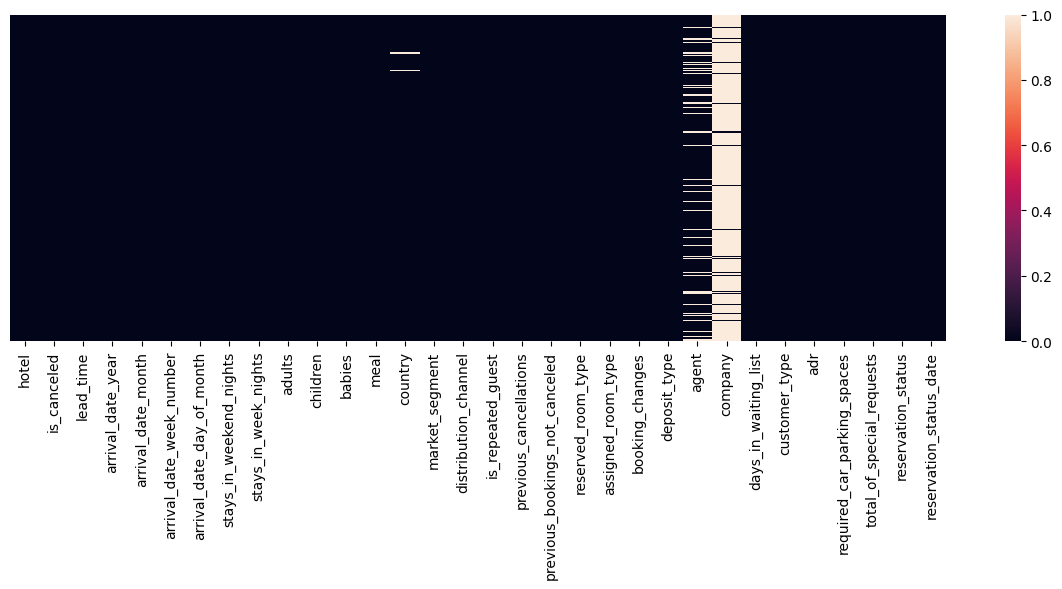

In [146]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [147]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.shape
#no tienenmucha relevancia 

(119390, 30)

columnas con missing values:
* country
* agent
* company
* children


In [148]:
nan_replacement_dict = {"children": 0 ,"country" : "UKNWN", 'agent' : 0.0, 'company' : 0}
df.fillna(value=nan_replacement_dict, inplace=True)

In [149]:
df.isna().isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [150]:
df.duplicated().sum()


np.int64(32020)

In [151]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns.tolist()


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [152]:
df_categoric = df.select_dtypes(include='object')
df_categoric.columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [153]:
categoricas=[col for col in df.columns if df[col].dtype=='object']
categoricas=df[categoricas]
categoricas.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 178
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [154]:
for col in categoricas:
    print(f"{col}: {categoricas[col].nunique(),df[col].unique()}")

hotel: (2, array(['Resort Hotel', 'City Hotel'], dtype=object))
arrival_date_month: (12, array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object))
meal: (5, array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object))
country: (178, array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UKNWN', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'A

In [155]:
print(df['is_canceled'].value_counts())
print(df['is_canceled'].dtype)

is_canceled
0    75166
1    44224
Name: count, dtype: int64
int64


In [156]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [157]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_79070/3576284526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette="hls")


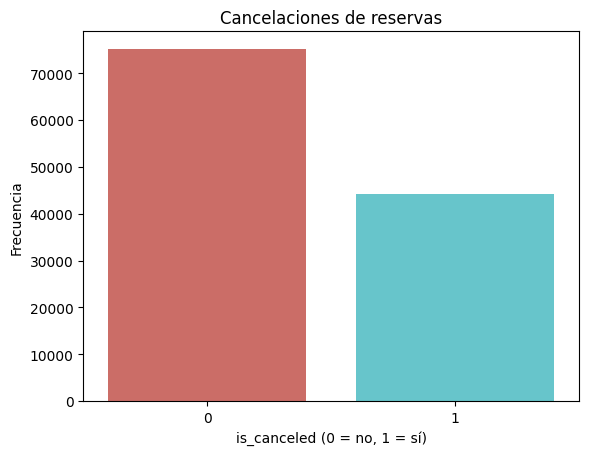

In [158]:
count = df['is_canceled'].value_counts()
sns.countplot(x='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones de reservas")
plt.xlabel("is_canceled (0 = no, 1 = sí)")
plt.ylabel("Frecuencia")
plt.show()



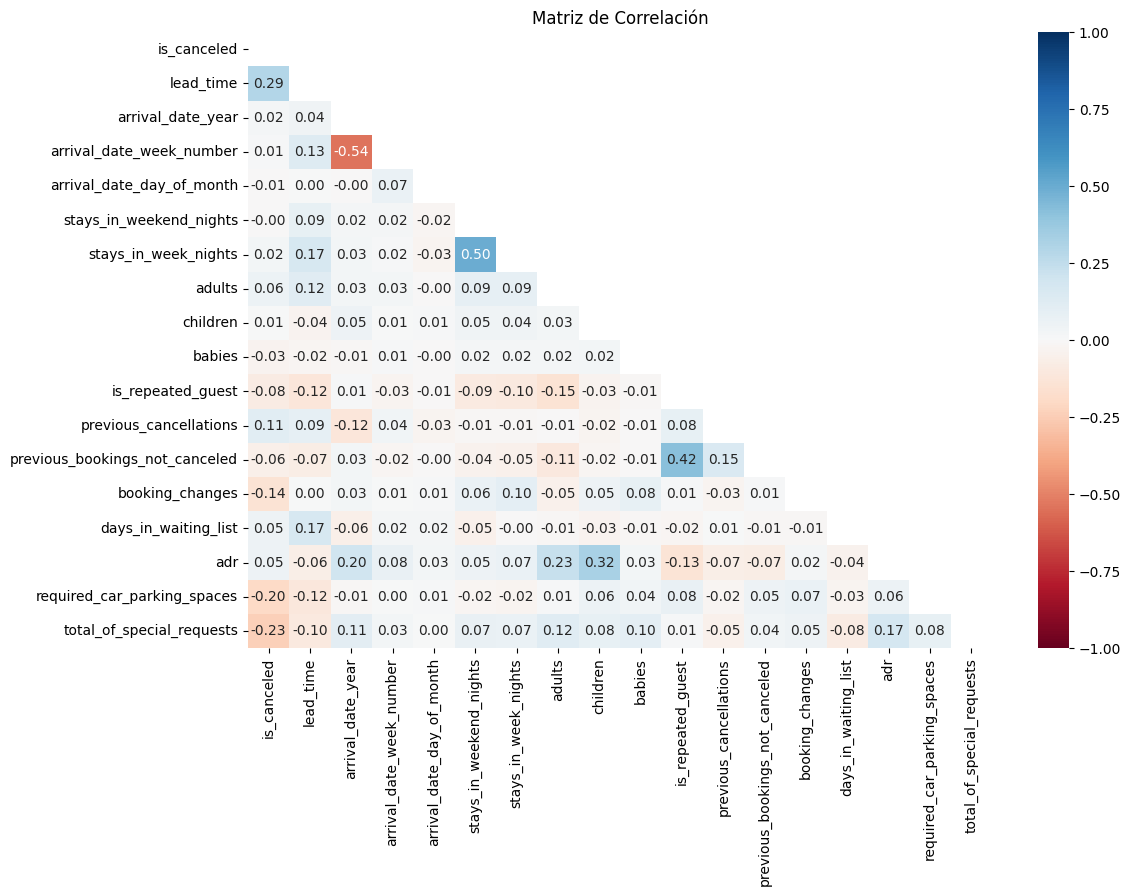

In [159]:
variables_numericas = ['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

correlacion = df[variables_numericas].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    mask=np.triu(correlacion)
)
plt.title("Matriz de Correlación")
plt.show()


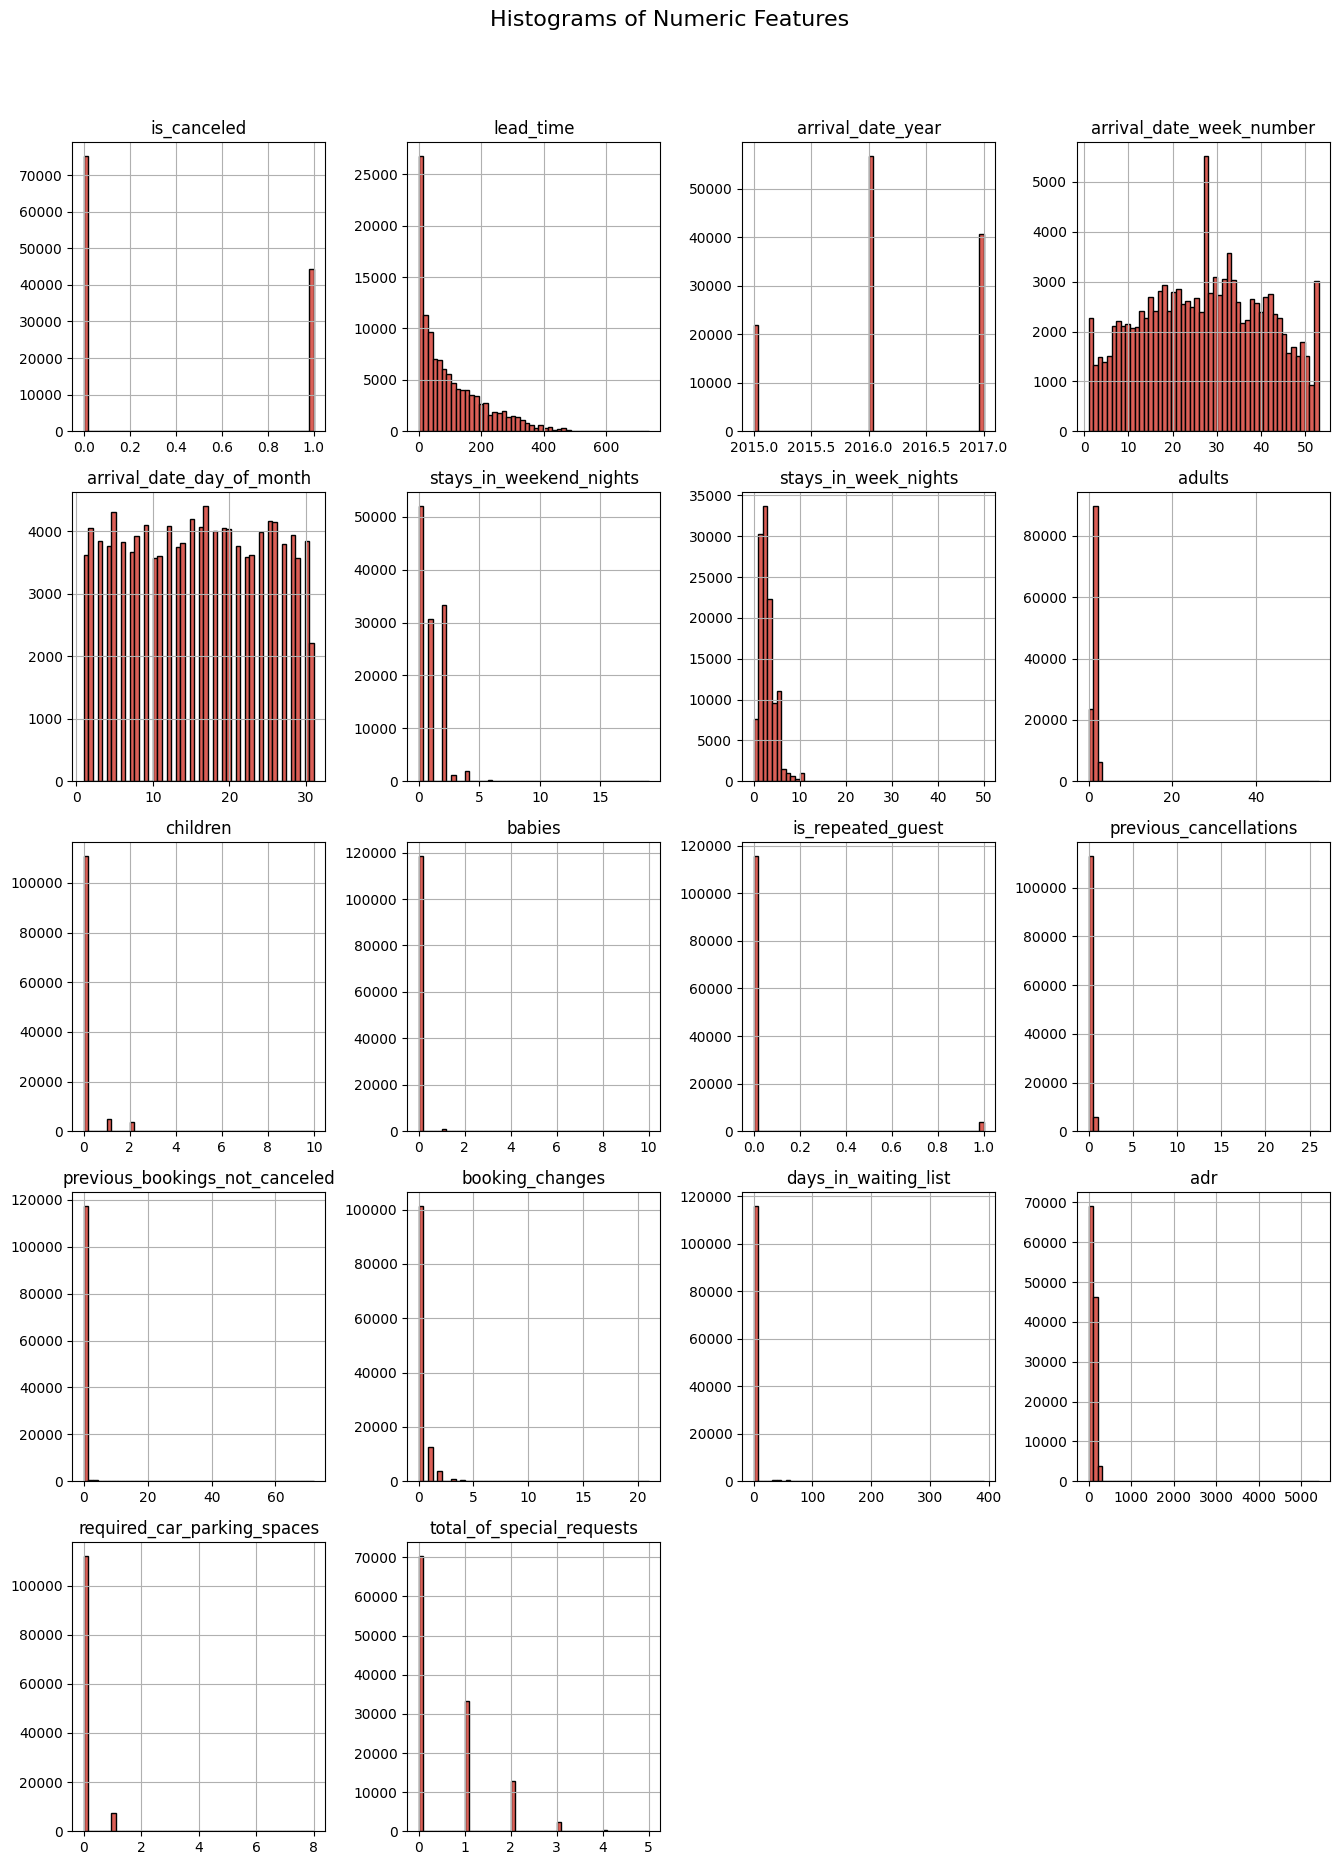

In [160]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

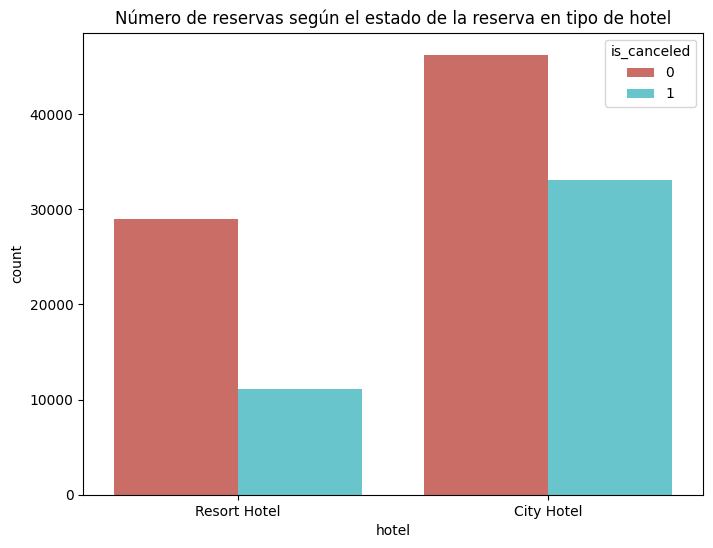

In [161]:
sns.set_palette("hls")
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled',palette="hls")
plt.title("Número de reservas según el estado de la reserva en tipo de hotel")
plt.show()

In [162]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: count, dtype: int64

Los hoteles de la ciudad tienen una tasa de cancelación más alta que los resorts.
Alrededor del 30% en los resorts y más del 50% en los urbanos.

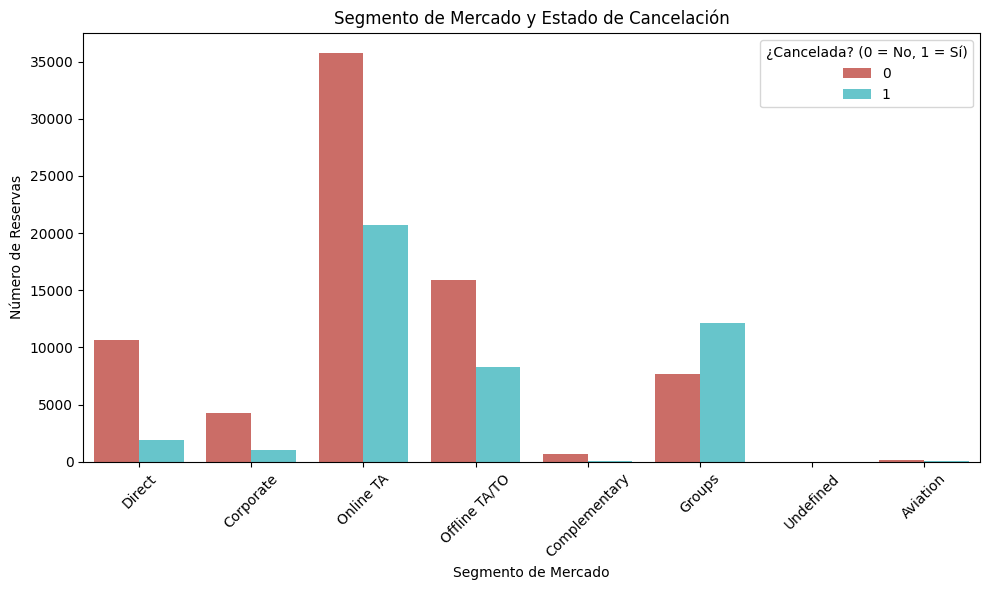

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.countplot(
    x='market_segment',
    data=df,
    hue='is_canceled',
    palette="hls",
    ax=ax
)

ax.set_title("Segmento de Mercado y Estado de Cancelación")
ax.set_xlabel("Segmento de Mercado")
ax.set_ylabel("Número de Reservas")
ax.legend(title="¿Cancelada? (0 = No, 1 = Sí)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las tasas de cancelación suelen ser altas en las reservas online, presencial y de grupo.

Text(0.5, 1.0, 'Lead Time por Año de Llegada y Cancelación')

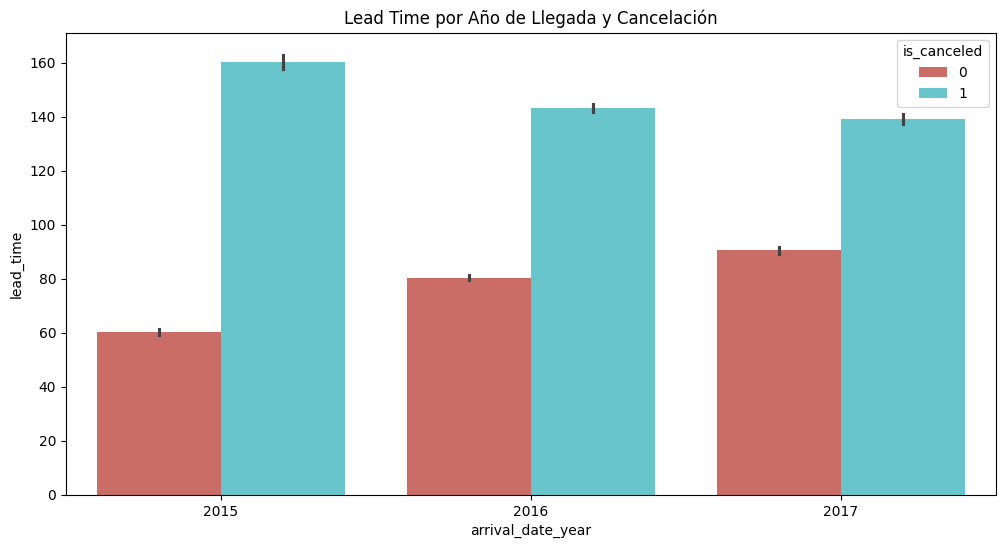

In [164]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette="hls")
plt.title("Lead Time por Año de Llegada y Cancelación")

In [165]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Reservas por Año de Llegada y Tipo de Hotel')

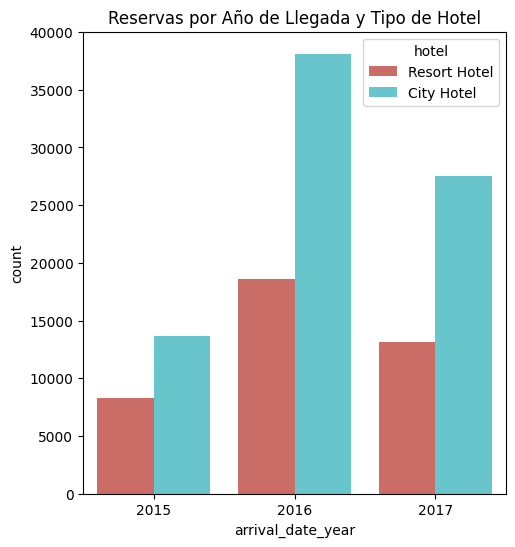

In [166]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette="hls")
plt.title("Reservas por Año de Llegada y Tipo de Hotel")

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_79070/2356601939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")


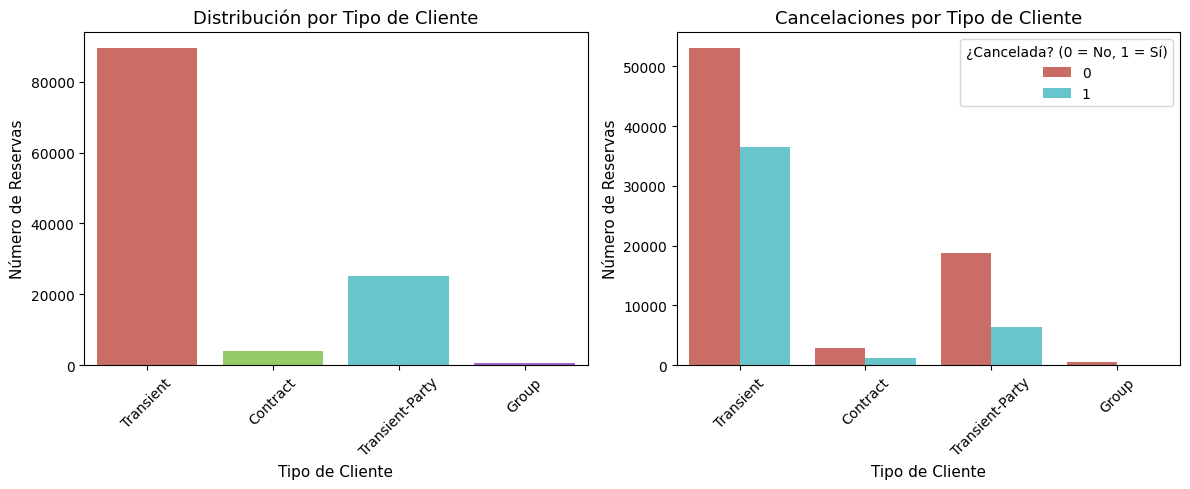

In [167]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")
ax[0].set_title("Distribución por Tipo de Cliente", fontsize=13)
ax[0].set_xlabel("Tipo de Cliente", fontsize=11)
ax[0].set_ylabel("Número de Reservas", fontsize=11)
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x='customer_type', data=df, hue='is_canceled', ax=ax[1], palette="hls")
ax[1].set_title("Cancelaciones por Tipo de Cliente", fontsize=13)
ax[1].set_xlabel("Tipo de Cliente", fontsize=11)
ax[1].set_ylabel("Número de Reservas", fontsize=11)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title="¿Cancelada? (0 = No, 1 = Sí)", fontsize=10)

plt.tight_layout()
plt.show()


El tipo de cliente Transient concentra la mayoría de las reservas y también la mayor proporción de cancelaciones.
En cambio, Contract casi no cancela, mostrando un comportamiento mucho más estable.

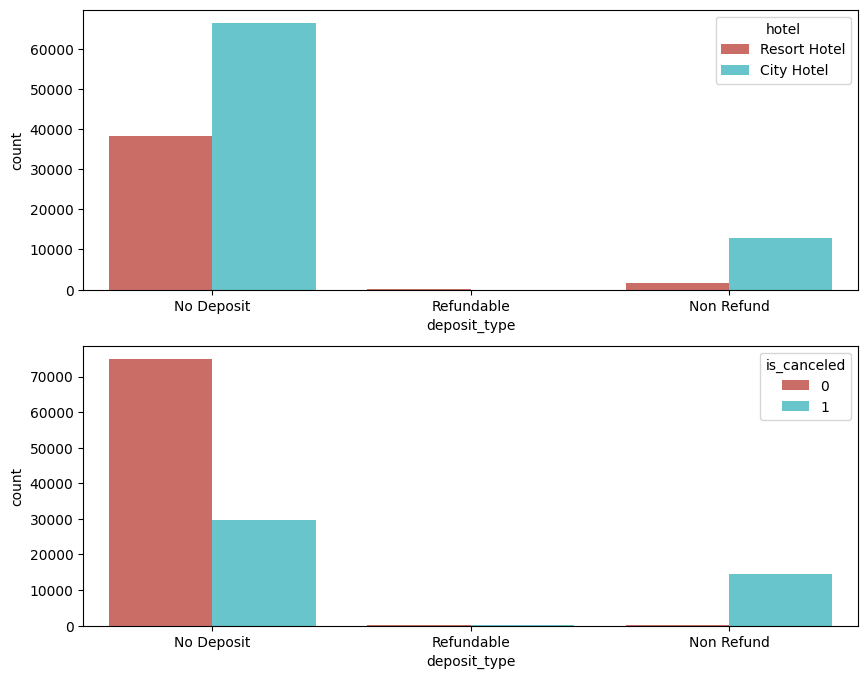

In [168]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0],palette="hls")
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1], palette="hls")
plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_79070/2767393659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")


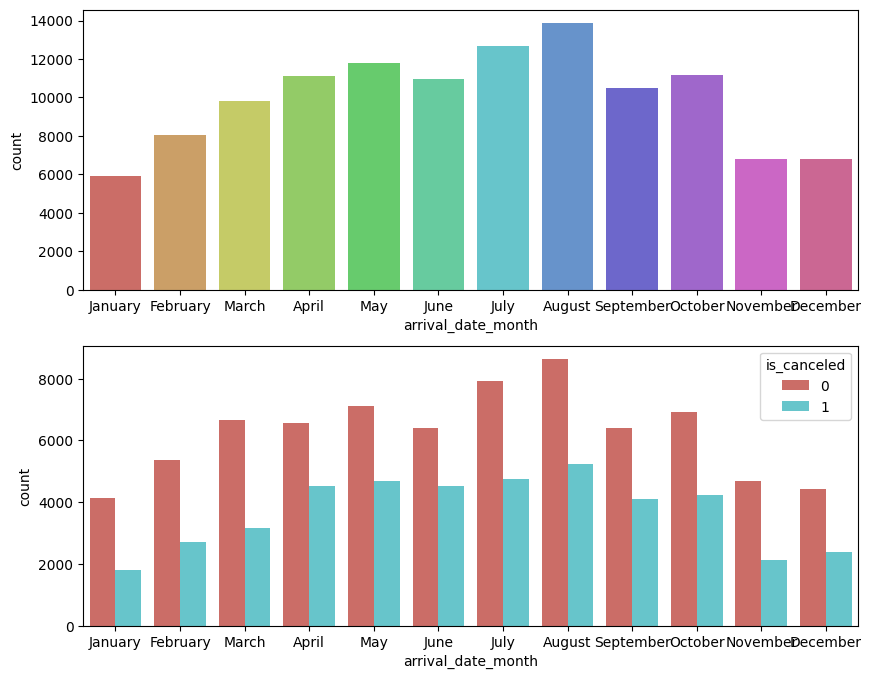

In [169]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order, palette="hls")
plt.show()

Box plots of numerical features vs cancellation status falta

Cancelación debido a la diferencia entre el tipo de habitación deseada y la asignada¶

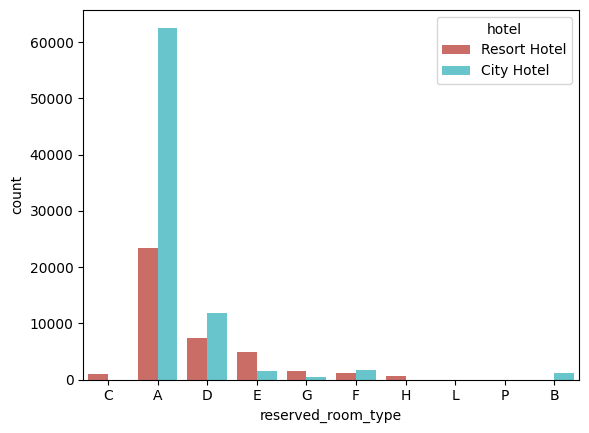

In [170]:
sns.countplot(x = 'reserved_room_type', hue = 'hotel', data = df, palette="hls")
plt.show()


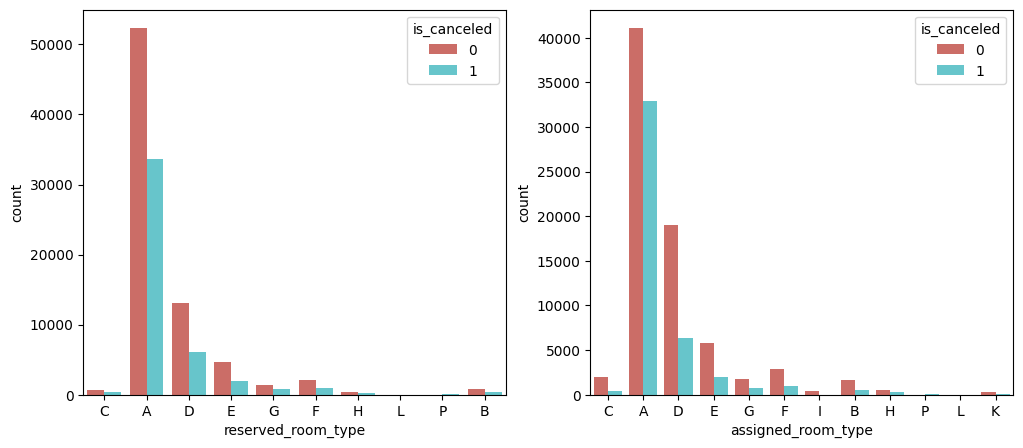

In [171]:

_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df,  ax = ax[0], palette="hls")
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df,  ax = ax[1], palette="hls")
plt.show()


Los tipos de habitación A, D y E tienen un nivel de reserva y asignación bastante alto. Sin embargo, como resultado, también tienen una alta tasa de cancelación.  un motivo de cancelación podría ser la asignación de un tipo de habitación no deseado. 

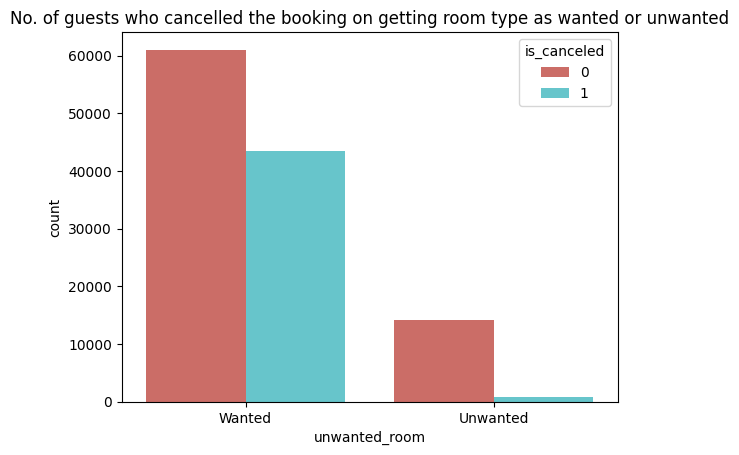

In [172]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')
df['unwanted_room'] = unwanted_room
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled', palette="hls")
plt.title("No. of guests who cancelled the booking on getting room type as wanted or unwanted")
plt.show()


Aunque inicialmente pensamos que una reserva se cancelaría con mayor probabilidad cuando el tipo de habitación asignado no coincidía con el solicitado, los datos muestran que la tasa de cancelación en estos casos es muy baja.
Esto significa que la diferencia entre la habitación reservada y la asignada no parece influir de forma significativa en las cancelaciones.

MODELO

In [173]:
df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'unwanted_room'],
      dtype='object')

In [174]:
df.drop(columns=['reservation_status', 'reservation_status_date',
'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month'], inplace=True)


eliminamos estas porque esas columnas no existen en el momento real de la reserva, solo existen después del resultado.

In [175]:
hotel={'Resort Hotel':0 , 'City Hotel':1 }


In [176]:
df['hotel']=df['hotel'].map(hotel)

In [177]:
#one hot encoding 
df = pd.get_dummies(df, drop_first=True, dtype=int)


In [178]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,unwanted_room_Wanted
0,0,0,342,2015,1,0,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,737,2015,1,0,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,7,2015,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,13,2015,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,14,2015,1,2,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [179]:
X= df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=40
)


📌 RANDOM FOREST RESULTS

Accuracy: 0.8848870648016305

Confusion Matrix:
 [[21080  1470]
 [ 2653 10614]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     22550
           1       0.88      0.80      0.84     13267

    accuracy                           0.88     35817
   macro avg       0.88      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



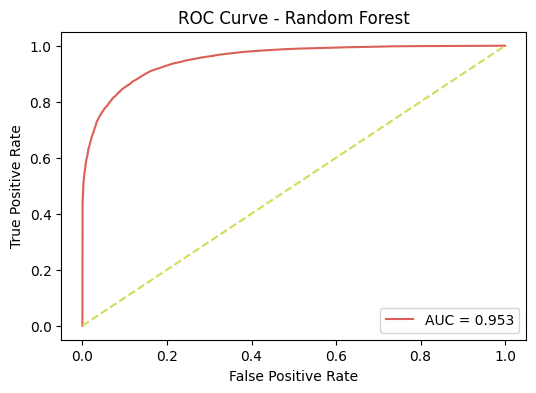

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)

rf = RandomForestClassifier(n_jobs=-1, random_state=40)
rf.fit(X_train, y_train)


rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]


print("📌 RANDOM FOREST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



📌 XGBOOST RESULTS

Accuracy: 0.8700617025434849

Confusion Matrix:
 [[20670  1880]
 [ 2774 10493]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22550
           1       0.85      0.79      0.82     13267

    accuracy                           0.87     35817
   macro avg       0.86      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



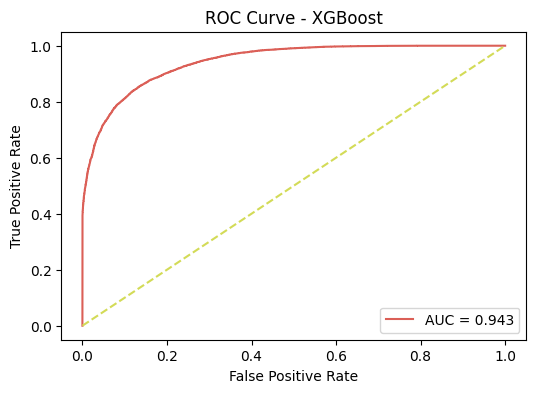

In [182]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===========================
# Entrenamiento
# ===========================
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=40,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# ===========================
# Predicciones
# ===========================
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# ===========================
# Métricas
# ===========================
print("📌 XGBOOST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

# ===========================
# ROC & AUC
# ===========================
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
